# Task-03 Prediction using Decision Tree Algorithm

### Decision Trees


This notebook will go through the understanding of decision trees.<br>
- For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically.
- The purpose is if we feed any new data to this classifier, it would be able to
predict the right class accordingly.
- Dataset : https://bit.ly/3kXTdox

#### Author: Renaldy Dwi Nugraha

In [1]:
# Importing libraries in Python
import pandas as pd
import numpy as np
import sklearn.datasets as datasets
iris=datasets.load_iris()

# Forming the iris dataframe
df=pd.read_csv("../Iris.csv", index_col=0)
print(df.head(5))


    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
Id                                                                       
1             5.1           3.5            1.4           0.2  Iris-setosa
2             4.9           3.0            1.4           0.2  Iris-setosa
3             4.7           3.2            1.3           0.2  Iris-setosa
4             4.6           3.1            1.5           0.2  Iris-setosa
5             5.0           3.6            1.4           0.2  Iris-setosa


In [2]:
X=df.iloc[:,[0,1,2,3]]
print(X.head())

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Id                                                          
1             5.1           3.5            1.4           0.2
2             4.9           3.0            1.4           0.2
3             4.7           3.2            1.3           0.2
4             4.6           3.1            1.5           0.2
5             5.0           3.6            1.4           0.2


In [3]:
y=df.iloc[:,[-1]]
print(y.head())

        Species
Id             
1   Iris-setosa
2   Iris-setosa
3   Iris-setosa
4   Iris-setosa
5   Iris-setosa


### Visualize the input variables

In [4]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000222CCEE4F48>,
      dtype=object)

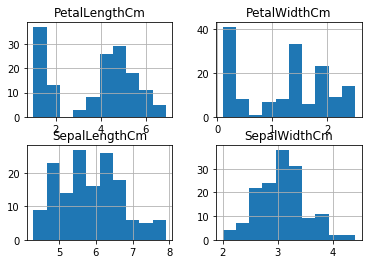

In [5]:
df.hist()

In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Check the correlation in X data**

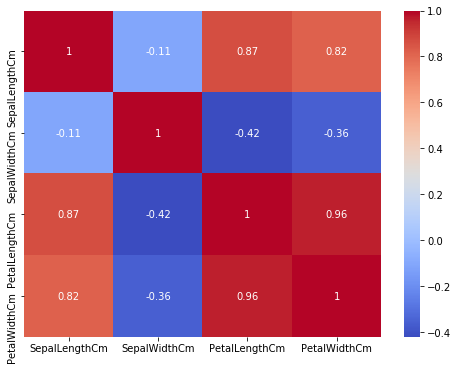

In [7]:
import seaborn as sns
cor = X.corr()
plt.figure(figsize=(8,6))
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.show()

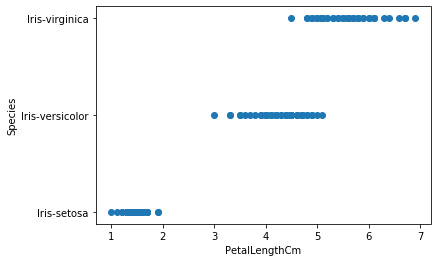

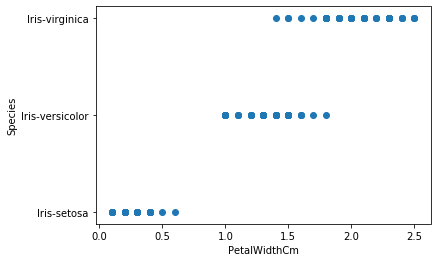

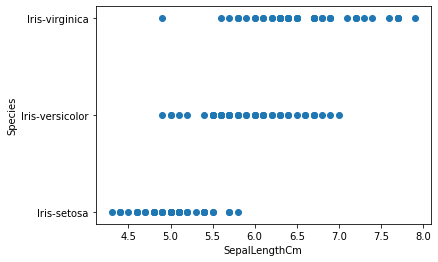

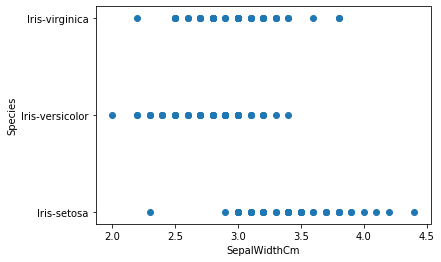

In [8]:

plt.scatter(df['PetalLengthCm'], df['Species'])
plt.xlabel('PetalLengthCm')
plt.ylabel('Species')
plt.show()

plt.scatter(df['PetalWidthCm'], df['Species'])
plt.xlabel('PetalWidthCm')
plt.ylabel('Species')
plt.show()

plt.scatter(df['SepalLengthCm'], df['Species'])
plt.xlabel('SepalLengthCm')
plt.ylabel('Species')
plt.show()

plt.scatter(df['SepalWidthCm'], df['Species'])
plt.xlabel('SepalWidthCm')
plt.ylabel('Species')
plt.show()

### Split the train and test
Define the test as 30% of total datasets

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.30, stratify=y, random_state=12)

In [10]:
print("Total datasets:", df.shape)

#Split train and test
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

Total datasets: (150, 5)
X_train: (105, 4)
X_test: (45, 4)
y_train: (105, 1)
y_test: (45, 1)


### Define the decision Tree Algorithm

In [11]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [12]:
model.score(X_test, y_test)

0.9777777777777777

### Lets check whether the data could predict the "species" based on input data or not

Check the input data :  'SepalLengthCm':[5], 
                  'SepalWidthCm':[2.2], 
                  'PetalLength':[3.8], 
                  'PetalWidthCm':[0.9]

In [13]:
dict={'SepalLengthCm':[5], 'SepalWidthCm':[2.2], 'PetalLength':[3.8], 'PetalWidthCm':[0.9]}
data=pd.DataFrame(dict)
data

,SepalLengthCm,SepalWidthCm,PetalLength,PetalWidthCm
0,5,2.2,3.8,0.9


In [14]:
print("Prediction result:", model.predict(data))

Prediction result: ['Iris-versicolor']


### Visualize the Decision Tree

In [15]:
# Install required libraries
#!pip install pydotplus
#!apt-get install graphviz -y

C:\Users\renal\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


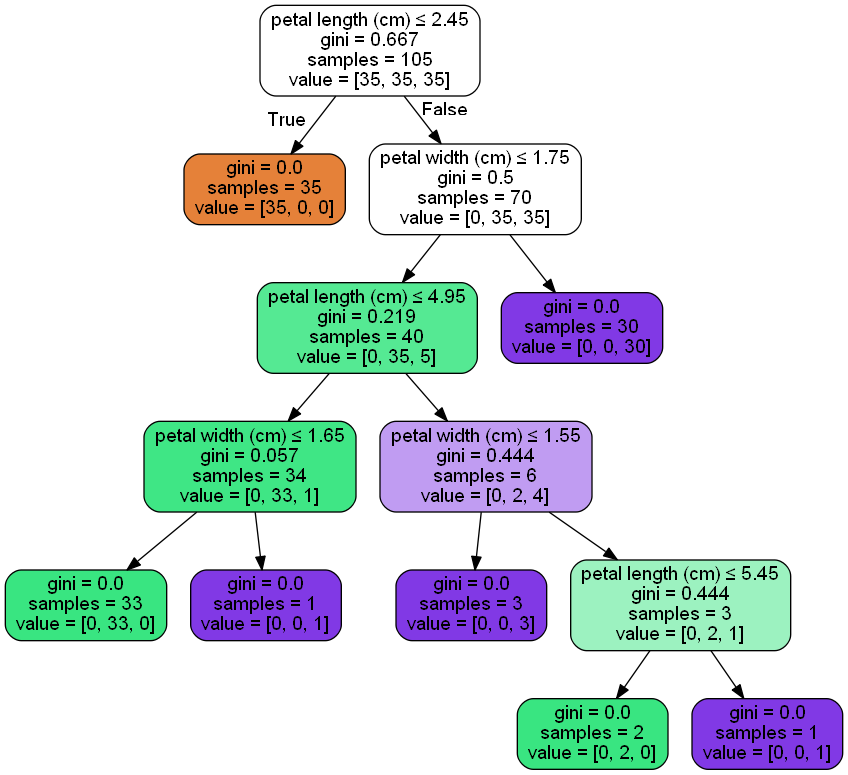

In [16]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus


# Visualize the graph
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())